In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

In [7]:
(train_images, train_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

In [8]:
train_images.shape, test_images.shape

((60000, 28, 28), (10000, 28, 28))

In [9]:
train_images = train_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

In [31]:
train_images.shape, test_images.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

In [11]:
train_images, test_images = train_images / 255.0, test_images / 255.0

In [15]:
def plot_sample_images(images, labels, class_names, num_images=5):
  plt.figure(figsize=(10, 5))
  for i in range(num_images):
    plt.subplot(1, num_images, i + 1)
    plt.imshow(images[i].reshape(28, 28), cmap=plt.cm.binary)
    plt.title(class_names[labels[i]])
    plt.axis('off')
  plt.show()

In [16]:
class_names = [ 'T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot' ]

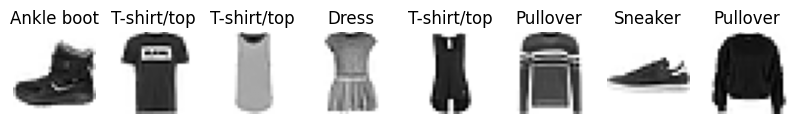

In [17]:
plot_sample_images(train_images, train_labels, class_names, num_images=8)

In [18]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [19]:
model = models.Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) # Input shape needs to be given always for the first layer only, afterwards, automatically adjusted
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(16, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(8, (3, 3), activation='relu'))
# model.add(MaxPooling2D((2, 2))) Avoid having pool layer towards the last - better for performance

model.add(Flatten())
model.add(Dense(64, activation='relu'))

model.add(Dense(10, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.compile(optimizer = 'adam'
              , loss = 'sparse_categorical_crossentropy'
              , metrics = ['accuracy']
              )

In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 16)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 8)             │           1,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 72)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │           4,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,426 (44.63 KB)

 Trainable params: 11,426 (44.63 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
history = model.fit(train_images, train_labels, epochs=3,
                    validation_data=(test_images, test_labels))

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.6901 - loss: 0.8414 - val_accuracy: 0.8255 - val_loss: 0.4670
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step - accuracy: 0.8471 - loss: 0.4141 - val_accuracy: 0.8577 - val_loss: 0.3870
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.8659 - loss: 0.3628 - val_accuracy: 0.8635 - val_loss: 0.3785


In [35]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose = 2)
print(f"Test accuracy: {test_acc}")

313/313 - 1s - 2ms/step - accuracy: 0.8635 - loss: 0.3785
Test accuracy: 0.8634999990463257
